#### Import Data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Credit.csv')
df.head(5)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [9]:
X = df[['Income','Rating','Cards','Age','Education']]
X.head(5)

,Income,Rating,Cards,Age,Education
0,14.891,283,2,34,11
1,106.025,483,3,82,15
2,104.593,514,4,71,11
3,148.924,681,3,36,11
4,55.882,357,2,68,16


In [10]:
Y = df['Limit']
Y.head(5)

0    3606
1    6645
2    7075
3    9504
4    4897
Name: Limit, dtype: int64

#### Creating pairplot

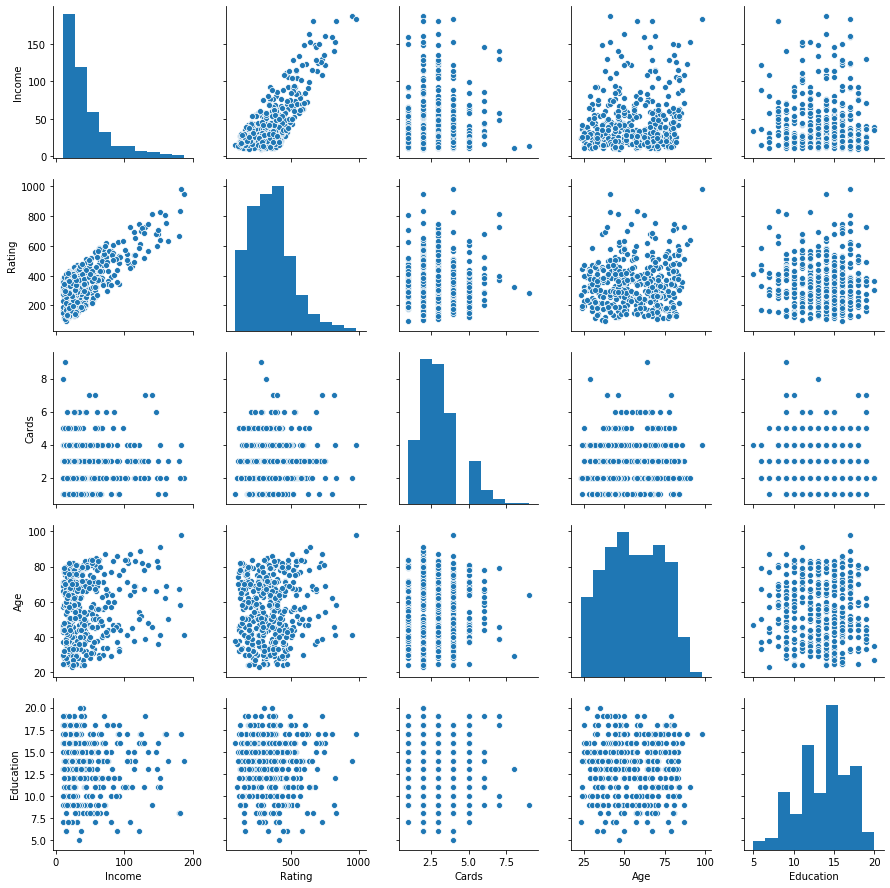

In [11]:
sns.pairplot(X)

#### This plot shows that there is a linear relationship between Rating and Income

#### The correlation matrix shows that Rating is highly correlated with Limit. Rating is also correlated with Balance and Income

In [12]:
corr_matrix = df.corr()
corr_matrix['Rating'].sort_values(ascending=False)

Rating        1.000000
Limit         0.996880
Balance       0.863625
Income        0.791378
Age           0.103165
Cards         0.053239
Unnamed: 0    0.021985
Education    -0.030136
Name: Rating, dtype: float64

#### The correlation matrix shows that Income is highly correlated with Limit. Income is also correlated with Rating

In [13]:
corr_matrix['Income'].sort_values(ascending=False)

Income        1.000000
Limit         0.792088
Rating        0.791378
Balance       0.463656
Age           0.175338
Unnamed: 0    0.037203
Cards        -0.018273
Education    -0.027692
Name: Income, dtype: float64

## Independent Variable : Income

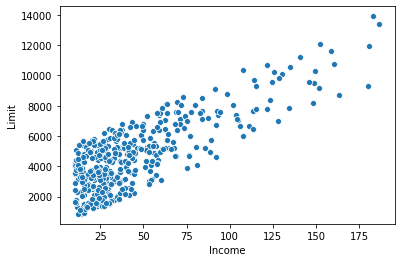

In [23]:
from sklearn.linear_model import LinearRegression
sns.scatterplot(x="Income", y="Limit", data=df)

#### The scatter plot of Income against Limit shows the relation is linear. (Exogeneity)

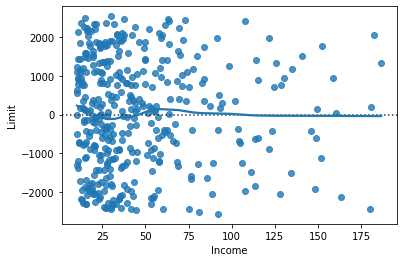

In [24]:
sns.residplot(x="Income",y="Limit",data=df,lowess=True)

#### The residual plot shows the distribution is random or the variance is constant (Homoskedasticity)

In [27]:
feat = 'Income'
regression = LinearRegression().fit(X[[feat]],Y)
regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print('Coefficient is : {}'.format(regression.coef_))

Coefficient is : [51.8750206]


In [34]:
print('Intercept is : {}'.format(regression.intercept_))

Intercept is : 2389.8694089155265


In [36]:
print('Coefficient of determination R^2 : {} '.format(regression.score(X[[feat]],Y).round(3)))

Coefficient of determination R^2 : 0.627 


In [32]:
print('Equation : y = {} x + {} + error'.format(regression.coef_[0].round(3),regression.intercept_.round(3)))

Equation : y = 51.875 x + 2389.869 + error


## Independent Variable : Rating

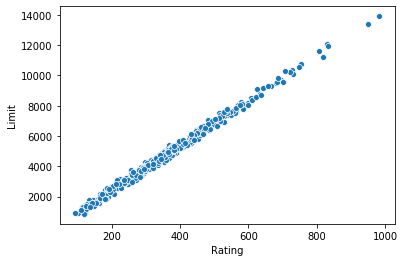

In [54]:
sns.scatterplot(x="Rating", y="Limit", data=df)

#### The scatter plot of Rating against Limit shows the relation is linear. (Exogeneity)

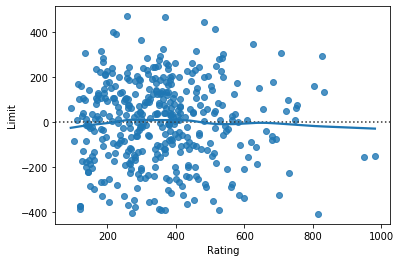

In [39]:
sns.residplot(x="Rating",y="Limit",data=df,lowess=True)

#### The residual plot shows the distribution is random or the variance is constant (Homoskedasticity)

In [41]:
feat = "Rating"
regression = LinearRegression().fit(X[[feat]],Y)
regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
print('Coefficient is : {}'.format(regression.coef_))

Coefficient is : [14.87160712]


In [44]:
print('Intercept is : {}'.format(regression.intercept_))

Intercept is : -542.928229986901


In [45]:
print('Coefficient of determination R^2 : {}'.format(regression.score(X[[feat]],Y).round(3)))

Coefficient of determination R^2 : 0.994


In [46]:
print('Equation : y = {} x + {} + error'.format(regression.coef_[0].round(3),regression.intercept_.round(3)))

Equation : y = 14.872 x + -542.928 + error


## Independent Variable : Cards

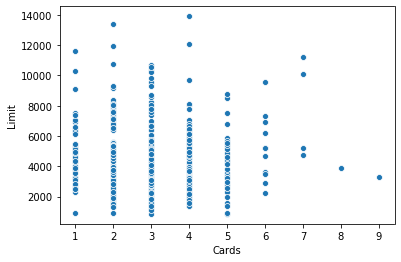

In [47]:
sns.scatterplot(x="Cards", y="Limit", data=df)

#### The scatter plot of Cards against Limit shows the relation is not linear. Hence SLR cannot be performed

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


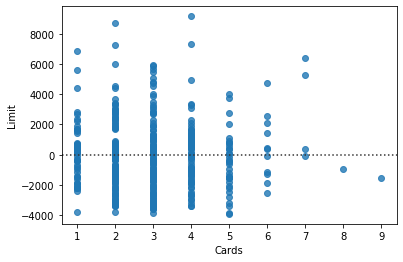

In [48]:
sns.residplot(x="Cards",y="Limit",data=df,lowess=True)

#### The residual plot shows the variance is not constant (Heteroskedasticity)

In [49]:
feat = "Cards"
regression = LinearRegression().fit(X[[feat]],Y)
regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
print('Coefficient is : {}'.format(regression.coef_))

Coefficient is : [17.22189457]


In [51]:
print('Intercept is : {}'.format(regression.intercept_))

Intercept is : 4684.666246822009


In [52]:
print('Coefficient of determination R^2 : {}'.format(regression.score(X[[feat]],Y).round(3)))

Coefficient of determination R^2 : 0.0


In [53]:
print('Equation : y = {} x + {} + error'.format(regression.coef_[0].round(3),regression.intercept_.round(3)))

Equation : y = 17.222 x + 4684.666 + error


## Independent Variable : Age

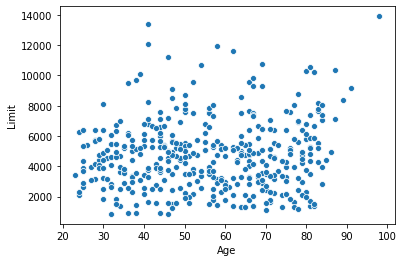

In [55]:
sns.scatterplot(x="Age",y="Limit", data=df)

#### The scatter plot of Age against Limit shows the relation is not linear. Hence SLR cannot be performed

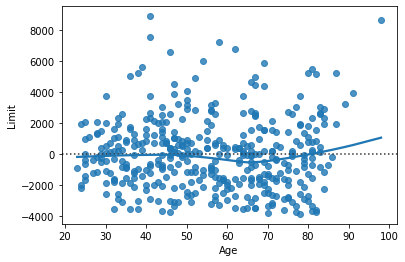

In [56]:
sns.residplot(x="Age",y="Limit", data=df, lowess=True)

#### The residual plot shows the variance is not constant (Heteroskedasticity)

In [60]:
feat="Age"
regression = LinearRegression().fit(X[[feat]],Y)
regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
print('Coefficient is : {}'.format(regression.coef_))

Coefficient is : [13.49982568]


In [62]:
print('Intercept is : {}'.format(regression.intercept_))

Intercept is : 3984.0984540274258


In [63]:
print('Coefficient of determination R^2 : {}'.format(regression.score(X[[feat]],Y).round(3)))

Coefficient of determination R^2 : 0.01


In [64]:
print('Equation : y = {} x + {} + error'.format(regression.coef_[0].round(3),regression.intercept_.round(3)))

Equation : y = 13.5 x + 3984.098 + error


## Independent Variable : Education 

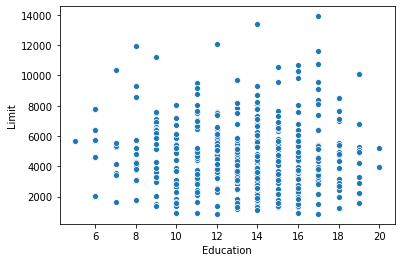

In [65]:
sns.scatterplot(x="Education",y="Limit", data=df)

#### The scatter plot of Education against Limit shows the relation is not linear. Hence SLR cannot be performed

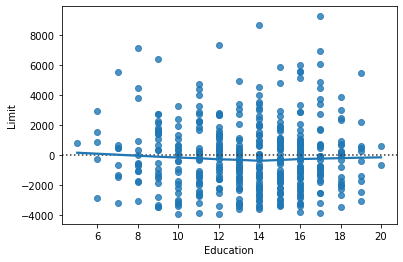

In [66]:
sns.residplot(x="Education",y="Limit", data=df, lowess=True)

#### The residual plot shows the variance is not constant (Heteroskedasticity)

In [67]:
feat="Education"
regression = LinearRegression().fit(X[[feat]],Y)
regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
print('Coefficient is : {}'.format(regression.coef_))

Coefficient is : [-17.39235309]


In [69]:
print('Intercept is : {}'.format(regression.intercept_))

Intercept is : 4969.527149089043


In [70]:
print('Coefficient of determination R^2 : {}'.format(regression.score(X[[feat]],Y).round(3)))

Coefficient of determination R^2 : 0.001


In [71]:
print('Equation : y = {} x + {} + error'.format(regression.coef_[0].round(3),regression.intercept_.round(3)))

Equation : y = -17.392 x + 4969.527 + error
